# Given

an image

# Generate

reduce the colours of this image to 16 and generate an optimized version

# Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kmeans import kmeans

data.shape = (427, 640, 3)


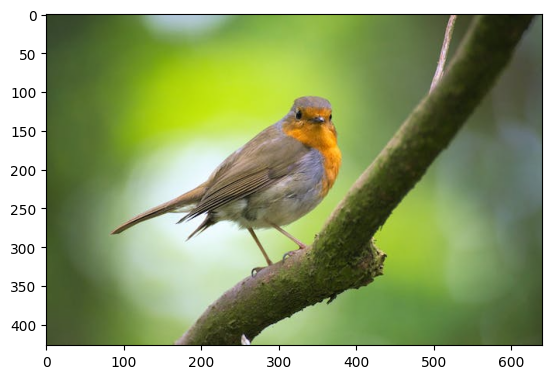

In [2]:
data = plt.imread('./Lab1.5_image.png')

# 3rd dimension has 4 elements, where 4th is an alpha channel (always 255) - it can be removed
if data.shape[2] == 4:
    data = data[:, :, :3]

print(f"data.shape = {data.shape}")

plt.imshow(data)

Transform to 2d

In [3]:
data_reshaped = np.reshape(data, (data.shape[0] * data.shape[1], 3))
data_reshaped.shape

(273280, 3)

Run k-means for 16 clusters

In [4]:
result = kmeans(data_reshaped, max_iterations = 3, num_clusters = 16, error_margin = 20)

Best result out of 3 default runs

In [5]:
all_losses = [val[0] for val in result.values()]
best_result = result[np.argmin(all_losses)]
print(f"best result loss = {best_result[0]}, \n\n best clusters = {best_result[1]} \n\n assignments = {best_result[2]}")

best result loss = 1722.5734904503267, 

 best clusters = [[0.585764   0.65352386 0.45689175]
 [0.29460147 0.35518697 0.190868  ]
 [0.23172556 0.25685954 0.11848604]
 [0.8912428  0.95708925 0.93464386]
 [0.1430666  0.16102195 0.05535566]
 [0.75400454 0.87799656 0.30088103]
 [0.51927876 0.67809975 0.2182401 ]
 [0.79823774 0.88263994 0.7592419 ]
 [0.44066143 0.48043817 0.38518333]
 [0.4399631  0.5762472  0.28356794]
 [0.72704023 0.82561916 0.5239116 ]
 [0.7058874  0.850469   0.08955068]
 [0.7675001  0.49978656 0.13113561]
 [0.35884845 0.43636996 0.24016853]
 [0.6922525  0.741134   0.6453943 ]
 [0.61705613 0.7580715  0.2980268 ]] 

 assignments = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1

In [6]:
assignments = best_result[2]
centroids = best_result[1]

# Answer

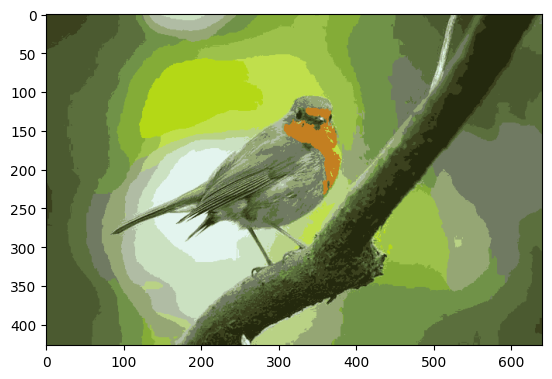

In [7]:
result_image = centroids[assignments].reshape(427, 640, 3)
plt.imshow(result_image)

Plot results

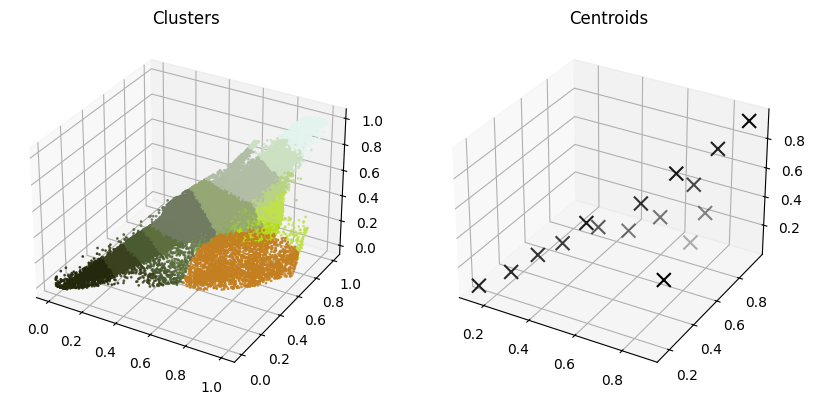

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))

# Create first subplot for clusters
ax1 = fig.add_subplot(121, projection='3d')
cluster = ax1.scatter(data_reshaped[:,0],data_reshaped[:,1],data_reshaped[:,2], s = 1, c = centroids[assignments], label='Clusters')
ax1.set_title('Clusters')

# Create second subplot for centroids
ax2 = fig.add_subplot(122, projection='3d')
centroid = ax2.scatter(centroids[:,0],centroids[:,1],centroids[:,2], s = 100, c = 'black', marker = 'x', label='Centroids')
ax2.set_title('Centroids')

plt.show()
